In [1]:
import os
import sys
sys.path.append('..')
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.3
session = tf.Session(config=config)

In [3]:
%matplotlib inline
import cv2
import time
import pylab
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import glob,os
from IPython.display import clear_output
from keras.models import load_model
#from src.inference.inference import inference
#from src.train.train_stages import
from beepose.models.train_model import get_testing_model_new

In [4]:
import keras.backend as K
def eucl_loss(x, y):
    return K.sum(K.square(x - y)) / 10 / 2


In [5]:
video = cv2.VideoCapture('/mnt/storage/Gurabo/videos/Gurabo/mp4/C02_170621110000.mp4')#
#video = cv2.VideoCapture('/home/irodriguez/JANELIA/src/Data/Videos/new_box/mp4/126_04_R_180907110000AM.mp4')#
#video = cv2.VideoCapture('/mnt/storage/Gurabo/videos/Gurabo/mp4/166_01_R_170818010000.mp4')#'/mnt/storage/Gurabo/videos/Gurabo/mp4/C02_170610090000.mp4')

In [6]:
t,im=video.read()
FPS = 20
start_frame =1000
video.set(cv2.CAP_PROP_POS_MSEC,start_frame*1000.0/FPS)
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

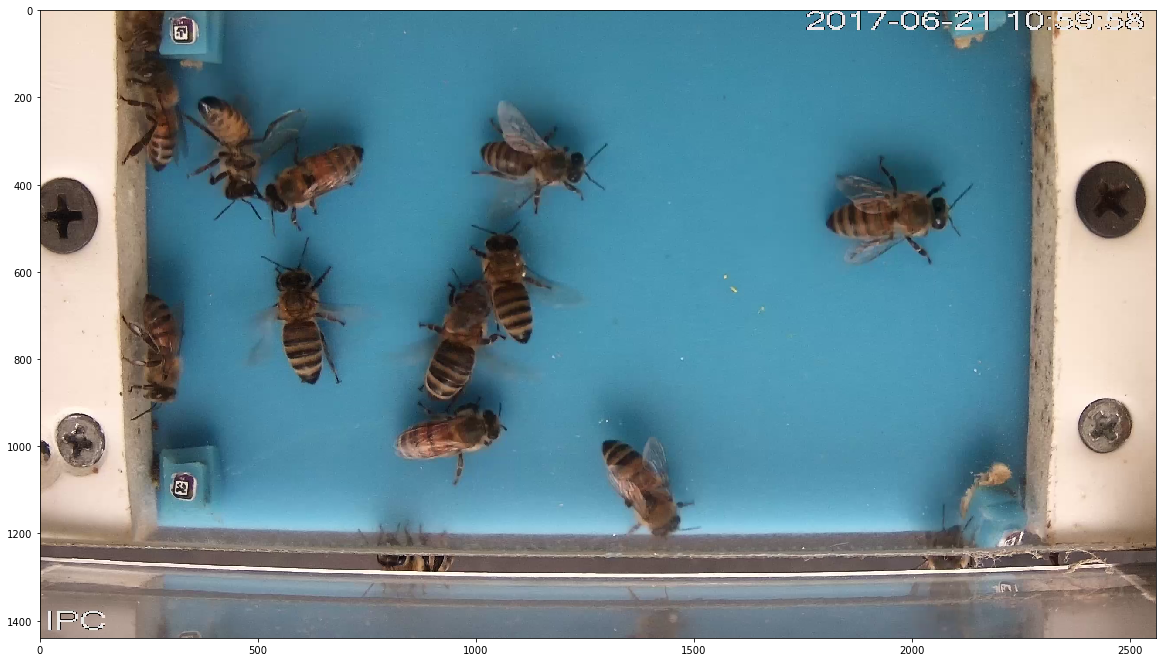

In [7]:
plt.rcParams['figure.figsize'] = (20,15)
plt.imshow(im)

In [8]:
colors = [[0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [255, 0, 0],[170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]
params = { 'scale_search':[1], 'thre1':{0:0.4,1:0.25,2:0.4,3:0.4,4:0.4,5:0.4,5:0.09,6:0.09,7:0.01}, 'thre2': 0.05, 'thre3': 0.4, 'min_num': 4, 'mid_num': 10, 'crop_ratio': 2.5, 'bbox_ratio': 0.25} 
model_params = {'boxsize': 368, 'padValue': 128, 'np': '12', 'stride': 8}          

In [11]:
pathmodel='../beepose/train/debugging_augmenter_transform/weights_3_12_6.best.h5' # '../models/pose/Complete_tag_2_16_8.best.h5'
#model = load_model(pathmodel)

In [9]:
custom_objects={'eucl_loss': eucl_loss}
model = load_model('../src/train/testing_new_augmenter/complete_model_2_8_16.h5',custom_objects=custom_objects)

In [14]:
keras_weights_file = pathmodel#"training/weights_logs/5p_2_new/weights_2.best.h5"#"training/weights_logs/5p_2_stages/weights_2.best.h5"
np1=12
np2=6
stages=3
# authors of original model don't use
# vgg normalization (subtracting mean) on input images
model = get_testing_model_new(np1=np1,np2=np2,stages=stages)
model.load_weights(keras_weights_file)

In [ ]:

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (10,15)
resize_factor=4
tim=[]
prof=[]
det,mapi =[],[]
FPS=20
start_frame=30000
end_frame=31000
np1=np1
np2=np2

mapIdx=[[0,1],[2,3],[4,5],[6,7]]
limbseq=[[1,3],[3,2],[2,4],[2,5],[1,2]]
numparts=5
#mapIdx = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13]]
#limbseq = [[1,3],[3,2],[2,1],[1,4],[1,5],[6,2],[7,2],[2,8]]

#video = cv2.VideoCapture('../Data/Videos/Hurricane/1_01_R_170808020000.mp4')
#video = cv2.VideoCapture('/mnt/storage/Gurabo/videos/Gurabo/mp4/C02_170610110000.mp4')
                    #../Data/Videos/C02_170622120000.mp4')
video.set(cv2.CAP_PROP_POS_MSEC,start_frame*1000.0/FPS)
show = True
save = False
frame_detections={}
try:
    for idx in range(start_frame,end_frame):    
        #print(idx)
        t,im = video.read()
        
        im = cv2.cvtColor(im,cv2.COLOR_RGB2BGR)
        im2=cv2.resize(im,(im.shape[1]//resize_factor,im.shape[0]//resize_factor))
        
        tic1 = time.time()
        canvas,mappings,parts = inference(im2, model,params, model_params,show=show,np1=np2,np2=np1,resize=resize_factor,
                                                    numparts=numparts,mapIdx=mapIdx,limbSeq=limbseq,distance_tolerance=300)
        frame_detections[idx]={}
        frame_detections[idx]['mapping']=mappings
        frame_detections[idx]['parts']=parts
        if show:
            canvas2 =cv2.resize(canvas,(im.shape[1],im.shape[0]))
            pylab.imshow(cv2.cvtColor(canvas2,cv2.COLOR_BGR2RGB))
            plt.title(idx)
            pylab.show()
        #break
        if save:
            cv2.imwrite('results/night/camera_%05d.jpg'%idx,canvas2) 
        clear_output(wait=True) 
        toc1 = time.time()
        tim.append(toc1-tic1)
except KeyboardInterrupt:
    # Release the Video Device
    # Message to be displayed after releasing the device
    print ("Released Video Resource")

Released Video Resource


In [21]:
images = glob.glob('../../src/keras_openpose_bee/dataset/POLLEN/*jpg')
images.sort()

In [17]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (10,15)
resize_factor=4
tim=[]
prof=[]
det,mapi =[],[]
FPS=20
start_frame=123
end_frame=500
np1=16
np2=8
mapIdx = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13]]
limbseq = [[1,3],[3,2],[2,1],[1,4],[1,5],[2,6],[2,7],[2,8]]
#video = cv2.VideoCapture('../Data/Videos/Hurricane/1_01_R_170808020000.mp4')
#video = cv2.VideoCapture('/mnt/storage/Gurabo/videos/Gurabo/mp4/C02_170610110000.mp4')
                    #../Data/Videos/C02_170622120000.mp4')
video.set(cv2.CAP_PROP_POS_MSEC,start_frame*1000.0/FPS)
show = True
save = True
frame_detections={}
try:
    for idx in range(len(images)):    
        #print(idx)
        #t,im = video.read()
        im = cv2.imread(images[idx])
        #im = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
        im2=cv2.resize(im,(im.shape[1]//resize_factor,im.shape[0]//resize_factor))
        
        tic1 = time.time()
        canvas,mappings,parts = inference(im2, model,params, model_params,show=show,np1=np2,np2=np1,resize=resize_factor,
                                                    numparts=8,mapIdx=mapIdx,limbSeq=limbseq,distance_tolerance=250)
        frame_detections[idx]={}
        frame_detections[idx]['mapping']=mappings
        frame_detections[idx]['parts']=parts
        if show:
            canvas2 =cv2.resize(canvas,(im.shape[1],im.shape[0]))
            pylab.imshow(cv2.cvtColor(canvas2,cv2.COLOR_BGR2RGB))
            pylab.show()
        #break
        if save:
            filename=os.path.join('results/',images[idx].split('/')[-1])
            cv2.imwrite(filename,canvas2) 
        clear_output(wait=True) 
        toc1 = time.time()
        tim.append(toc1-tic1)
        plt.title(images[idx])
except KeyboardInterrupt:
    # Release the Video Device
    # Message to be displayed after releasing the device
    print ("Released Video Resource")

NameError: name 'images' is not defined

0.4

In [19]:
import glob,os,sys
sys.path.append('..')
import cv2
import math
from beepose.utils import util 
import numpy as np
import json 
from scipy.ndimage.filters import gaussian_filter

FPS=20

# Color constant
colors= [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]

 

def inference(input_image,model, params, model_params,show=True,np1=19,np2=38,resize=1,distance_tolerance=310,numparts=5,
              mapIdx=[[0,1],[2,3],[4,5],[6,7],[8,9]],
              limbSeq=[[1,3],[3,2],[2,4],[2,5],[1,2]]):
    """
    This function uses the model to generate the heatmaps and pafs then use them to produce the poses. 
    
    inputs: 
    
        - input_image : An image
        - model : A trained keras model 
        - params : Parameters used  for adapting the image to match training
        - model_params : Parameters for padding the images after resizing
        - show : Boolean to generate a canvas with the poses on there. 
        - np1 : Number of channels for pafs. 
        - np2 : Number of channels for heatmaps. 
        - resize: Resize factor of the image. 
        - distance_tolerance: Maximum distance between two parts. 
        - numparts: Number of parts
        - mapIdx: configuration for the pafs  0 based 
        - limbSeq: configuration of the poses. It should match with the pafs configuration. 1 based
        
    Outputs : 
        - canvas: if Show, generates an image with the pose. 
        - mapping : How the parts are connected. 
        - parts : Detections for each of the parts considered. 
        
        model_params['boxsize'] 
        model_params['stride']
        model_params['padValue']
        params['scale_search']
        params['thre1']
        params['thre2']
    """
    profiling ={}
    oriImg = input_image#cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)#cv2.imread(input_image)  # B,G,R order
    canvas = oriImg.copy()#cv2.imread(input_image) 
    multiplier = [x * model_params['boxsize'] / oriImg.shape[0] for x in params['scale_search']]

    heatmap_avg = np.zeros((oriImg.shape[0], oriImg.shape[1], np1))
    paf_avg = np.zeros((oriImg.shape[0], oriImg.shape[1], np2))
    

    scale =1
    imageToTest = cv2.resize(oriImg, (0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    imageToTest_padded, pad = util.padRightDownCorner(imageToTest, model_params['stride'],
                                                          model_params['padValue'])
    input_img = np.transpose(np.float32(imageToTest_padded[:,:,:,np.newaxis]), (3,0,1,2)) # required shape (1, width, height, channels)
    output_blobs = model.predict(input_img)
        
        # extract outputs, resize, and remove padding
    heatmap = np.squeeze(output_blobs[1])  # output 1 is heatmaps
    heatmap = cv2.resize(heatmap, (0, 0), fx=model_params['stride'], fy=model_params['stride'],interpolation=cv2.INTER_CUBIC)
    heatmap = heatmap[:imageToTest_padded.shape[0] - pad[2], :imageToTest_padded.shape[1] - pad[3],:]
    heatmap = cv2.resize(heatmap, (oriImg.shape[1], oriImg.shape[0]), interpolation=cv2.INTER_CUBIC)
    paf = np.squeeze(output_blobs[0])  # output 0 is PAFs
    paf = cv2.resize(paf, (0, 0), fx=model_params['stride'], fy=model_params['stride'],
                         interpolation=cv2.INTER_CUBIC)
    paf = paf[:imageToTest_padded.shape[0] - pad[2], :imageToTest_padded.shape[1] - pad[3], :]
    paf = cv2.resize(paf, (oriImg.shape[1], oriImg.shape[0]), interpolation=cv2.INTER_CUBIC)
        
    heatmap_avg =  heatmap[...] +heatmap_avg #/ len(multiplier)
    paf_avg =  paf[...] +paf_avg# / len(multiplier)
    

    all_peaks = []
    peak_counter = 0
    threshold_detection = params['thre1']
    for part in range(numparts):
        map_ori = heatmap_avg[:, :, part]
        map = map_ori#gaussian_filter(map_ori, sigma=3)

        map_left = np.zeros(map.shape)
        map_left[1:, :] = map[:-1, :]
        map_right = np.zeros(map.shape)
        map_right[:-1, :] = map[1:, :]
        map_up = np.zeros(map.shape)
        map_up[:, 1:] = map[:, :-1]
        map_down = np.zeros(map.shape)
        map_down[:, :-1] = map[:, 1:]
        
        peaks_binary = np.logical_and.reduce(
            (map >= map_left, map >= map_right, map >= map_up, map >= map_down, map > threshold_detection[part]))
        peaks = list(zip(np.nonzero(peaks_binary)[1], np.nonzero(peaks_binary)[0]))  # note reverse
        if part in [1,5,6,7]:
            peaks = list(non_max_suppression_op(peaks))
        peaks_with_score = [x + (map_ori[x[1], x[0]],) for x in peaks]
        id = range(peak_counter, peak_counter + len(peaks))
        peaks_with_score_and_id = [peaks_with_score[i] + (id[i],) for i in range(len(id))]

        all_peaks.append(peaks_with_score_and_id)
        
        peak_counter += len(peaks)
    connection_all = []
    special_k = []
    mid_num = 20
    for k in range(len(mapIdx)):
        score_mid = paf_avg[:, :, [x  for x in mapIdx[k]]]
        #print(len(all_peaks))
        candA = all_peaks[limbSeq[k][0] - 1]
        candB = all_peaks[limbSeq[k][1] - 1]
        nA = len(candA)
        nB = len(candB)
        indexA, indexB = limbSeq[k]
        if (nA != 0 and nB != 0):
            connection_candidate = []
            for i in range(nA):
                for j in range(nB):
                    vec = np.subtract(candB[j][:2], candA[i][:2])
                    norm = math.sqrt(vec[0] * vec[0] + vec[1] * vec[1])
                    # failure case when 2 body parts overlaps
                    if norm == 0:
                        continue
                    if norm >distance_tolerance//resize:
                        continue 
                        
                    vec = np.divide(vec, norm)

                    startend = list(zip(np.linspace(candA[i][0], candB[j][0], num=mid_num), \
                                   np.linspace(candA[i][1], candB[j][1], num=mid_num)))

                    vec_x = np.array(
                        [score_mid[int(round(startend[I][1])), int(round(startend[I][0])), 0] \
                         for I in range(len(startend))])
                    vec_y = np.array(
                        [score_mid[int(round(startend[I][1])), int(round(startend[I][0])), 1] \
                         for I in range(len(startend))])

                    score_midpts = np.multiply(vec_x, vec[0]) + np.multiply(vec_y, vec[1])
                    score_with_dist_prior = sum(score_midpts) / len(score_midpts) + min(
                        0.5 * oriImg.shape[0] / norm - 1, 0)
                    criterion1 = len(np.nonzero(score_midpts > params['thre2'])[0]) > 0.7 * len(
                        score_midpts)
                    criterion2 = score_with_dist_prior > 0
                    if criterion1 and criterion2:
                        connection_candidate.append([i, j, score_with_dist_prior,
                                                     score_with_dist_prior + candA[i][2] + candB[j][2]])

            connection_candidate = sorted(connection_candidate, key=lambda x: x[2], reverse=True)
            connection = np.zeros((0, 5))
            for c in range(len(connection_candidate)):
                i, j, s = connection_candidate[c][0:3]
                if (i not in connection[:, 3] and j not in connection[:, 4]):
                    connection = np.vstack([connection, [candA[i][3], candB[j][3], s, i, j]])
                    if (len(connection) >= min(nA, nB)):
                        break

            connection_all.append(connection)
        else:
            special_k.append(k)
            connection_all.append([])
    # last number in each row is the total parts number of that animal
    # the second last number in each row is the score of the overall configuration
    subset = -1 * np.ones((0, 20))
    candidate = np.array([item for sublist in all_peaks for item in sublist])
    for k in range(len(mapIdx)):
        if k not in special_k:
            partAs = connection_all[k][:, 0]
            partBs = connection_all[k][:, 1]
            indexA, indexB = np.array(limbSeq[k]) - 1

            for i in range(len(connection_all[k])):  # = 1:size(temp,1)
                found = 0
                subset_idx = [-1, -1]
                for j in range(len(subset)):  # 1:size(subset,1):
                    if subset[j][indexA] == partAs[i] or subset[j][indexB] == partBs[i]:
                        subset_idx[found] = j
                        found += 1

                if found == 1:
                    j = subset_idx[0]
                    if (subset[j][indexB] != partBs[i]):
                        subset[j][indexB] = partBs[i]
                        subset[j][-1] += 1
                        subset[j][-2] += candidate[partBs[i].astype(int), 2] + connection_all[k][i][2]
                elif found == 2:  # if found 2 and disjoint, merge them
                    j1, j2 = subset_idx
                    membership = ((subset[j1] >= 0).astype(int) + (subset[j2] >= 0).astype(int))[:-2]
                    if len(np.nonzero(membership == 2)[0]) == 0:  # merge
                        subset[j1][:-2] += (subset[j2][:-2] + 1)
                        subset[j1][-2:] += subset[j2][-2:]
                        subset[j1][-2] += connection_all[k][i][2]
                        subset = np.delete(subset, j2, 0)
                    else:  # as like found == 1
                        subset[j1][indexB] = partBs[i]
                        subset[j1][-1] += 1
                        subset[j1][-2] += candidate[partBs[i].astype(int), 2] + connection_all[k][i][2]

                # if find no partA in the subset, create a new subset
                elif not found and k < numparts:
                    row = -1 * np.ones(20)
                    row[indexA] = partAs[i]
                    row[indexB] = partBs[i]
                    row[-1] = 2
                    row[-2] = sum(candidate[connection_all[k][i, :2].astype(int), 2]) + \
                              connection_all[k][i][2]
                    subset = np.vstack([subset, row])
    # delete some rows of subset which has few parts occur
    #deleteIdx = [];
    #for i in range(len(subset)):
    #    if subset[i][-1] < 2 or subset[i][-2] / subset[i][-1] < 0.4:
    #         deleteIdx.append(i)
    #subset = np.delete(subset, deleteIdx, axis=0)
    temp_parts ={}
    parts={}
    for i in range(numparts):#17
        temp_parts[i]=[]
        for j in range(len(all_peaks[i])):
            a=all_peaks[i][j][0]*resize
            b=all_peaks[i][j][1]*resize
            c=all_peaks[i][j][2]
            temp_parts[i].append([a,b,c])
        parts[i]=temp_parts[i]
    mappings=[]
    for i in range(numparts):#17
        for n in range(len(subset)):
            kind=limbSeq[i]
            index = subset[n][np.array(kind) - 1]
            if -1 in index:
                continue
            Y = candidate[index.astype(int), 0]
            X = candidate[index.astype(int), 1]
            S = candidate[index.astype(int), 2]
            mX = np.mean(X)
            mY = np.mean(Y)
            length = ((X[0]*resize - X[1]*resize) ** 2 + (Y[0]*resize - Y[1]*resize) ** 2) ** 0.5
            angle = math.degrees(math.atan2(X[0]*resize - X[1]*resize, Y[0]*resize - Y[1]*resize))
            mappings.append([[int(Y[0])*resize,int(X[0])*resize],[int(Y[1])*resize,int(X[1])*resize],np.array(S).mean(),length,angle,kind])
    if show:
        #canvas = cv2.imread(input_image)  # B,G,R order
        size=1
        thick=-1
        for i in range(numparts):#17
            if i > 4 and i<7:
                size=4
                thick =1
            if i>6:
                size=4
                thick =3
            for j in range(len(all_peaks[i])):
                
                cv2.circle(canvas, all_peaks[i][j][0:2], size, colors[i], thickness=thick)

        stickwidth = 10//(resize-1) #4

        for i in range(numparts):#17
            for n in range(len(subset)):
                index = subset[n][np.array(limbSeq[i]) - 1]
                if -1 in index:
                    continue
                cur_canvas = canvas.copy()
                Y = candidate[index.astype(int), 0]
                X = candidate[index.astype(int), 1]
                mX = np.mean(X)
                mY = np.mean(Y)
                length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
                angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
                polygon = cv2.ellipse2Poly((int(mY), int(mX)), (int(length / 2), stickwidth), int(angle), 0,
                                           360, 1)
                cv2.fillConvexPoly(cur_canvas, polygon, colors[i])
                canvas = cv2.addWeighted(canvas, 0.4, cur_canvas, 0.6, 0)
    
    return canvas,mappings,parts




In [18]:
import glob,os,sys
sys.path.append('..')
import cv2
import math
from beepose.utils import util 
import numpy as np
import json 
from scipy.ndimage.filters import gaussian_filter

FPS=20

# Color constant
colors= [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]

 

def inference(input_image,model, params, model_params,show=True,np1=19,np2=38,resize=1,distance_tolerance=310,numparts=5,
              mapIdx=[[0,1],[2,3],[4,5],[6,7],[8,9]],
              limbSeq=[[1,3],[3,2],[2,4],[2,5],[1,2]]):
    """
    This function uses the model to generate the heatmaps and pafs then use them to produce the poses. 
    
    inputs: 
    
        - input_image : An image
        - model : A trained keras model 
        - params : Parameters used  for adapting the image to match training
        - model_params : Parameters for padding the images after resizing
        - show : Boolean to generate a canvas with the poses on there. 
        - np1 : Number of channels for pafs. 
        - np2 : Number of channels for heatmaps. 
        - resize: Resize factor of the image. 
        - distance_tolerance: Maximum distance between two parts. 
        - numparts: Number of parts
        - mapIdx: configuration for the pafs  0 based 
        - limbSeq: configuration of the poses. It should match with the pafs configuration. 1 based
        
    Outputs : 
        - canvas: if Show, generates an image with the pose. 
        - mapping : How the parts are connected. 
        - parts : Detections for each of the parts considered. 
        
        model_params['boxsize'] 
        model_params['stride']
        model_params['padValue']
        params['scale_search']
        params['thre1']
        params['thre2']
    """
    profiling ={}
    oriImg = input_image#cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)#cv2.imread(input_image)  # B,G,R order
    canvas = oriImg.copy()#cv2.imread(input_image) 
    multiplier = [x * model_params['boxsize'] / oriImg.shape[0] for x in params['scale_search']]

    heatmap_avg = np.zeros((oriImg.shape[0], oriImg.shape[1], np1))
    paf_avg = np.zeros((oriImg.shape[0], oriImg.shape[1], np2))
    

    scale =1
    imageToTest = cv2.resize(oriImg, (0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    imageToTest_padded, pad = util.padRightDownCorner(imageToTest, model_params['stride'],
                                                          model_params['padValue'])
    input_img = np.transpose(np.float32(imageToTest_padded[:,:,:,np.newaxis]), (3,0,1,2)) # required shape (1, width, height, channels)
    output_blobs = model.predict(input_img)
        
        # extract outputs, resize, and remove padding
    heatmap = np.squeeze(output_blobs[1])  # output 1 is heatmaps
    heatmap = cv2.resize(heatmap, (0, 0), fx=model_params['stride'], fy=model_params['stride'],interpolation=cv2.INTER_CUBIC)
    heatmap = heatmap[:imageToTest_padded.shape[0] - pad[2], :imageToTest_padded.shape[1] - pad[3],:]
    heatmap = cv2.resize(heatmap, (oriImg.shape[1], oriImg.shape[0]), interpolation=cv2.INTER_CUBIC)
    paf = np.squeeze(output_blobs[0])  # output 0 is PAFs
    paf = cv2.resize(paf, (0, 0), fx=model_params['stride'], fy=model_params['stride'],
                         interpolation=cv2.INTER_CUBIC)
    paf = paf[:imageToTest_padded.shape[0] - pad[2], :imageToTest_padded.shape[1] - pad[3], :]
    paf = cv2.resize(paf, (oriImg.shape[1], oriImg.shape[0]), interpolation=cv2.INTER_CUBIC)
        
    heatmap_avg =  heatmap[...] +heatmap_avg #/ len(multiplier)
    paf_avg =  paf[...] +paf_avg# / len(multiplier)
    

    all_peaks = []
    peak_counter = 0
    threshold_detection = params['thre1']
    for part in range(numparts):
        map_ori = heatmap_avg[:, :, part]
        map = gaussian_filter(map_ori, sigma=3)

        map_left = np.zeros(map.shape)
        map_left[1:, :] = map[:-1, :]
        map_right = np.zeros(map.shape)
        map_right[:-1, :] = map[1:, :]
        map_up = np.zeros(map.shape)
        map_up[:, 1:] = map[:, :-1]
        map_down = np.zeros(map.shape)
        map_down[:, :-1] = map[:, 1:]
        
        peaks_binary = np.logical_and.reduce(
            (map >= map_left, map >= map_right, map >= map_up, map >= map_down, map > threshold_detection[part]))
        peaks = list(zip(np.nonzero(peaks_binary)[1], np.nonzero(peaks_binary)[0]))  # note reverse
        if part in [1,5,6,7]:
            peaks = list(non_max_suppression_op(peaks))
        peaks_with_score = [x + (map_ori[x[1], x[0]],) for x in peaks]
        id = range(peak_counter, peak_counter + len(peaks))
        peaks_with_score_and_id = [peaks_with_score[i] + (id[i],) for i in range(len(id))]

        all_peaks.append(peaks_with_score_and_id)
        
        peak_counter += len(peaks)
    connection_all = []
    special_k = []
    mid_num = 20
    for k in range(len(mapIdx)):
        score_mid = paf_avg[:, :, [x  for x in mapIdx[k]]]
        #print(len(all_peaks))
        candA = all_peaks[limbSeq[k][0] - 1]
        candB = all_peaks[limbSeq[k][1] - 1]
        nA = len(candA)
        nB = len(candB)
        indexA, indexB = limbSeq[k]
        if (nA != 0 and nB != 0):
            connection_candidate = []
            for i in range(nA):
                for j in range(nB):
                    vec = np.subtract(candB[j][:2], candA[i][:2])
                    norm = math.sqrt(vec[0] * vec[0] + vec[1] * vec[1])
                    # failure case when 2 body parts overlaps
                    if norm == 0:
                        continue
                    if norm >distance_tolerance//resize:
                        continue 
                        
                    vec = np.divide(vec, norm)

                    startend = list(zip(np.linspace(candA[i][0], candB[j][0], num=mid_num), \
                                   np.linspace(candA[i][1], candB[j][1], num=mid_num)))

                    vec_x = np.array(
                        [score_mid[int(round(startend[I][1])), int(round(startend[I][0])), 0] \
                         for I in range(len(startend))])
                    vec_y = np.array(
                        [score_mid[int(round(startend[I][1])), int(round(startend[I][0])), 1] \
                         for I in range(len(startend))])

                    score_midpts = np.multiply(vec_x, vec[0]) + np.multiply(vec_y, vec[1])
                    score_with_dist_prior = sum(score_midpts) / len(score_midpts) + min(
                        0.5 * oriImg.shape[0] / norm - 1, 0)
                    criterion1 = len(np.nonzero(score_midpts > params['thre2'])[0]) > 0.7 * len(
                        score_midpts)
                    criterion2 = score_with_dist_prior > 0
                    if criterion1 and criterion2:
                        connection_candidate.append([i, j, score_with_dist_prior,
                                                     score_with_dist_prior + candA[i][2] + candB[j][2]])

            connection_candidate = sorted(connection_candidate, key=lambda x: x[2], reverse=True)
            connection = np.zeros((0, 5))
            for c in range(len(connection_candidate)):
                i, j, s = connection_candidate[c][0:3]
                if (i not in connection[:, 3] and j not in connection[:, 4]):
                    connection = np.vstack([connection, [candA[i][3], candB[j][3], s, i, j]])
                    if (len(connection) >= min(nA, nB)):
                        break

            connection_all.append(connection)
        else:
            special_k.append(k)
            connection_all.append([])
    # last number in each row is the total parts number of that animal
    # the second last number in each row is the score of the overall configuration
    subset = -1 * np.ones((0, 20))
    candidate = np.array([item for sublist in all_peaks for item in sublist])
    for k in range(len(mapIdx)):
        if k not in special_k:
            partAs = connection_all[k][:, 0]
            partBs = connection_all[k][:, 1]
            indexA, indexB = np.array(limbSeq[k]) - 1

            for i in range(len(connection_all[k])):  # = 1:size(temp,1)
                found = 0
                subset_idx = [-1, -1]
                for j in range(len(subset)):  # 1:size(subset,1):
                    if subset[j][indexA] == partAs[i] or subset[j][indexB] == partBs[i]:
                        subset_idx[found] = j
                        found += 1

                if found == 1:
                    j = subset_idx[0]
                    if (subset[j][indexB] != partBs[i]):
                        subset[j][indexB] = partBs[i]
                        subset[j][-1] += 1
                        subset[j][-2] += candidate[partBs[i].astype(int), 2] + connection_all[k][i][2]
                elif found == 2:  # if found 2 and disjoint, merge them
                    j1, j2 = subset_idx
                    membership = ((subset[j1] >= 0).astype(int) + (subset[j2] >= 0).astype(int))[:-2]
                    if len(np.nonzero(membership == 2)[0]) == 0:  # merge
                        subset[j1][:-2] += (subset[j2][:-2] + 1)
                        subset[j1][-2:] += subset[j2][-2:]
                        subset[j1][-2] += connection_all[k][i][2]
                        subset = np.delete(subset, j2, 0)
                    else:  # as like found == 1
                        subset[j1][indexB] = partBs[i]
                        subset[j1][-1] += 1
                        subset[j1][-2] += candidate[partBs[i].astype(int), 2] + connection_all[k][i][2]

                # if find no partA in the subset, create a new subset
                elif not found and k < numparts:
                    row = -1 * np.ones(20)
                    row[indexA] = partAs[i]
                    row[indexB] = partBs[i]
                    row[-1] = 2
                    row[-2] = sum(candidate[connection_all[k][i, :2].astype(int), 2]) + \
                              connection_all[k][i][2]
                    subset = np.vstack([subset, row])
    # delete some rows of subset which has few parts occur
    #deleteIdx = [];
    #for i in range(len(subset)):
    #    if subset[i][-1] < 2 or subset[i][-2] / subset[i][-1] < 0.4:
    #         deleteIdx.append(i)
    #subset = np.delete(subset, deleteIdx, axis=0)
    temp_parts ={}
    parts={}
    for i in range(numparts):#17
        temp_parts[i]=[]
        for j in range(len(all_peaks[i])):
            a=all_peaks[i][j][0]*resize
            b=all_peaks[i][j][1]*resize
            c=all_peaks[i][j][2]
            temp_parts[i].append([a,b,c])
        parts[i]=temp_parts[i]
    mappings=[]
    for i in range(numparts):#17
        for n in range(len(subset)):
            kind=limbSeq[i]
            index = subset[n][np.array(kind) - 1]
            if -1 in index:
                continue
            Y = candidate[index.astype(int), 0]
            X = candidate[index.astype(int), 1]
            S = candidate[index.astype(int), 2]
            mX = np.mean(X)
            mY = np.mean(Y)
            length = ((X[0]*resize - X[1]*resize) ** 2 + (Y[0]*resize - Y[1]*resize) ** 2) ** 0.5
            angle = math.degrees(math.atan2(X[0]*resize - X[1]*resize, Y[0]*resize - Y[1]*resize))
            mappings.append([[int(Y[0])*resize,int(X[0])*resize],[int(Y[1])*resize,int(X[1])*resize],np.array(S).mean(),length,angle,kind])
    if show:
        #canvas = cv2.imread(input_image)  # B,G,R order
        size=1
        thick=-1
        for i in range(numparts):#17
            if i > 4 and i<7:
                size=4
                thick =1
            if i>6:
                size=4
                thick =3
            for j in range(len(all_peaks[i])):
                
                cv2.circle(canvas, all_peaks[i][j][0:2], size, colors[i], thickness=thick)

        stickwidth = 10//(resize-1) #4

        for i in range(numparts):#17
            for n in range(len(subset)):
                index = subset[n][np.array(limbSeq[i]) - 1]
                if -1 in index:
                    continue
                cur_canvas = canvas.copy()
                Y = candidate[index.astype(int), 0]
                X = candidate[index.astype(int), 1]
                mX = np.mean(X)
                mY = np.mean(Y)
                length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
                angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
                polygon = cv2.ellipse2Poly((int(mY), int(mX)), (int(length / 2), stickwidth), int(angle), 0,
                                           360, 1)
                cv2.fillConvexPoly(cur_canvas, polygon, colors[i])
                canvas = cv2.addWeighted(canvas, 0.4, cur_canvas, 0.6, 0)
    
    return canvas,mappings,parts



import numpy as np

import numpy as np

def boxes2peaks(boxes,size=15):
    dets=[]
    for b in boxes:
        dets.append((b[0]+size,b[1]+size))
    return dets
def peaks2boxes(parts,size=15):
    boxes=[]
    for p in parts:
        boxes.append([p[0]-size,p[1]-size,p[0]+size,p[1]+size])
    return np.array(boxes)


def non_max_suppression_op(peaks,overlap=0.6,size=15):
    boxes= non_max_suppression_fast(peaks2boxes(peaks,size),overlap)
    dets = boxes2peaks(boxes,size)
    return dets
        
# Malisiewicz et al.
def non_max_suppression_fast(boxes, overlapThresh):
	# if there are no boxes, return an empty list
	if len(boxes) == 0:
		return []
 
	# if the bounding boxes integers, convert them to floats --
	# this is important since we'll be doing a bunch of divisions
	if boxes.dtype.kind == "i":
		boxes = boxes.astype("float")
 
	# initialize the list of picked indexes	
	pick = []
 
	# grab the coordinates of the bounding boxes
	x1 = boxes[:,0]
	y1 = boxes[:,1]
	x2 = boxes[:,2]
	y2 = boxes[:,3]
 
	# compute the area of the bounding boxes and sort the bounding
	# boxes by the bottom-right y-coordinate of the bounding box
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = np.argsort(y2)
 
	# keep looping while some indexes still remain in the indexes
	# list
	while len(idxs) > 0:
		# grab the last index in the indexes list and add the
		# index value to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)
 
		# find the largest (x, y) coordinates for the start of
		# the bounding box and the smallest (x, y) coordinates
		# for the end of the bounding box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])
 
		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)
 
		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]
 
		# delete all indexes from the index list that have
		idxs = np.delete(idxs, np.concatenate(([last],
			np.where(overlap > overlapThresh)[0])))
 
	# return only the bounding boxes that were picked using the
	# integer data type
	return boxes[pick].astype("int")